In [1]:
data_path = '../../../data/'

In [85]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from jupyterthemes import jtplot

In [4]:
jtplot.style('gruvboxd')

# Data wrangling

In [6]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')

prof = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

In [7]:
tags_merged = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')

In [8]:
ans_que = ans.merge(tags_merged, left_on = "answers_question_id", right_on = "questions_id")

# Text pre-processing

In [15]:
stopwords = stopwords.words('english')

In [16]:
ps = PorterStemmer()
stemmed = dict()

In [17]:
def process_text(text: str):
    ret = []
    for word in word_tokenize(str(text).lower()):
        if word.isalpha() and word not in stopwords:
            if word not in stemmed:
                stemmed[word] = ps.stem(word)
            ret.append(stemmed[word])
    return ret

In [44]:
features = ['answers_body', 'questions_title', 'questions_body', 'professionals_industry']

In [19]:
for feature in tqdm(features):
    ans_que[feature] = ans_que[feature].apply(process_text)

In [24]:
ans_que['tags_tag_name'] = ans_que['tags_tag_name'].apply(process_text)
ans_que['tags_tag_name'] = ans_que['tags_tag_name'].apply(lambda x: ' '.join(x))

# Final preparation

In [29]:
df = ans_que.merge(prof, left_on = 'answers_author_id', right_on = 'professionals_id')

In [30]:
df

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",14147,332a511f1569444485cf7a7a556a5e54,14147,lectur,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",27490,332a511f1569444485cf7a7a556a5e54,27490,colleg,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",21438,332a511f1569444485cf7a7a556a5e54,21438,professor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",27490,0f1d6a4f276c4a05878dd48e03e52289,27490,colleg,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",21015,0f1d6a4f276c4a05878dd48e03e52289,21015,build,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",21727,0f1d6a4f276c4a05878dd48e03e52289,21727,soccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
6,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba

In [65]:
considerable = set(df.tags_tag_name.value_counts().where(lambda x: x>10).dropna().index)

In [66]:
len(considerable)

781

In [67]:
filtered = df[df.tags_tag_name.isin(considerable)]

In [68]:
filtered

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",14147,332a511f1569444485cf7a7a556a5e54,14147,lectur,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",27490,332a511f1569444485cf7a7a556a5e54,27490,colleg,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, ask, interest, question, give, two,...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",21438,332a511f1569444485cf7a7a556a5e54,21438,professor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",27490,0f1d6a4f276c4a05878dd48e03e52289,27490,colleg,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",21015,0f1d6a4f276c4a05878dd48e03e52289,21015,build,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, import, thing, rememb, go,...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",21727,0f1d6a4f276c4a05878dd48e03e52289,21727,soccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]",Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
6,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba

In [69]:
prepared = []
for feature in tqdm(features):
    prepared += [TaggedDocument(row[feature], [row.tags_tag_name]) for i, row in filtered.iterrows()]

In [70]:
prepared = random.sample(prepared, len(prepared))

In [71]:
len(prepared)

659320

# Doc2Vec

In [73]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [74]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 781 samples in 0.007s...
[t-SNE] Computed neighbors for 781 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 781 / 781
[t-SNE] Mean sigma: 0.849689
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.061447
[t-SNE] KL divergence after 1000 iterations: 1.095479


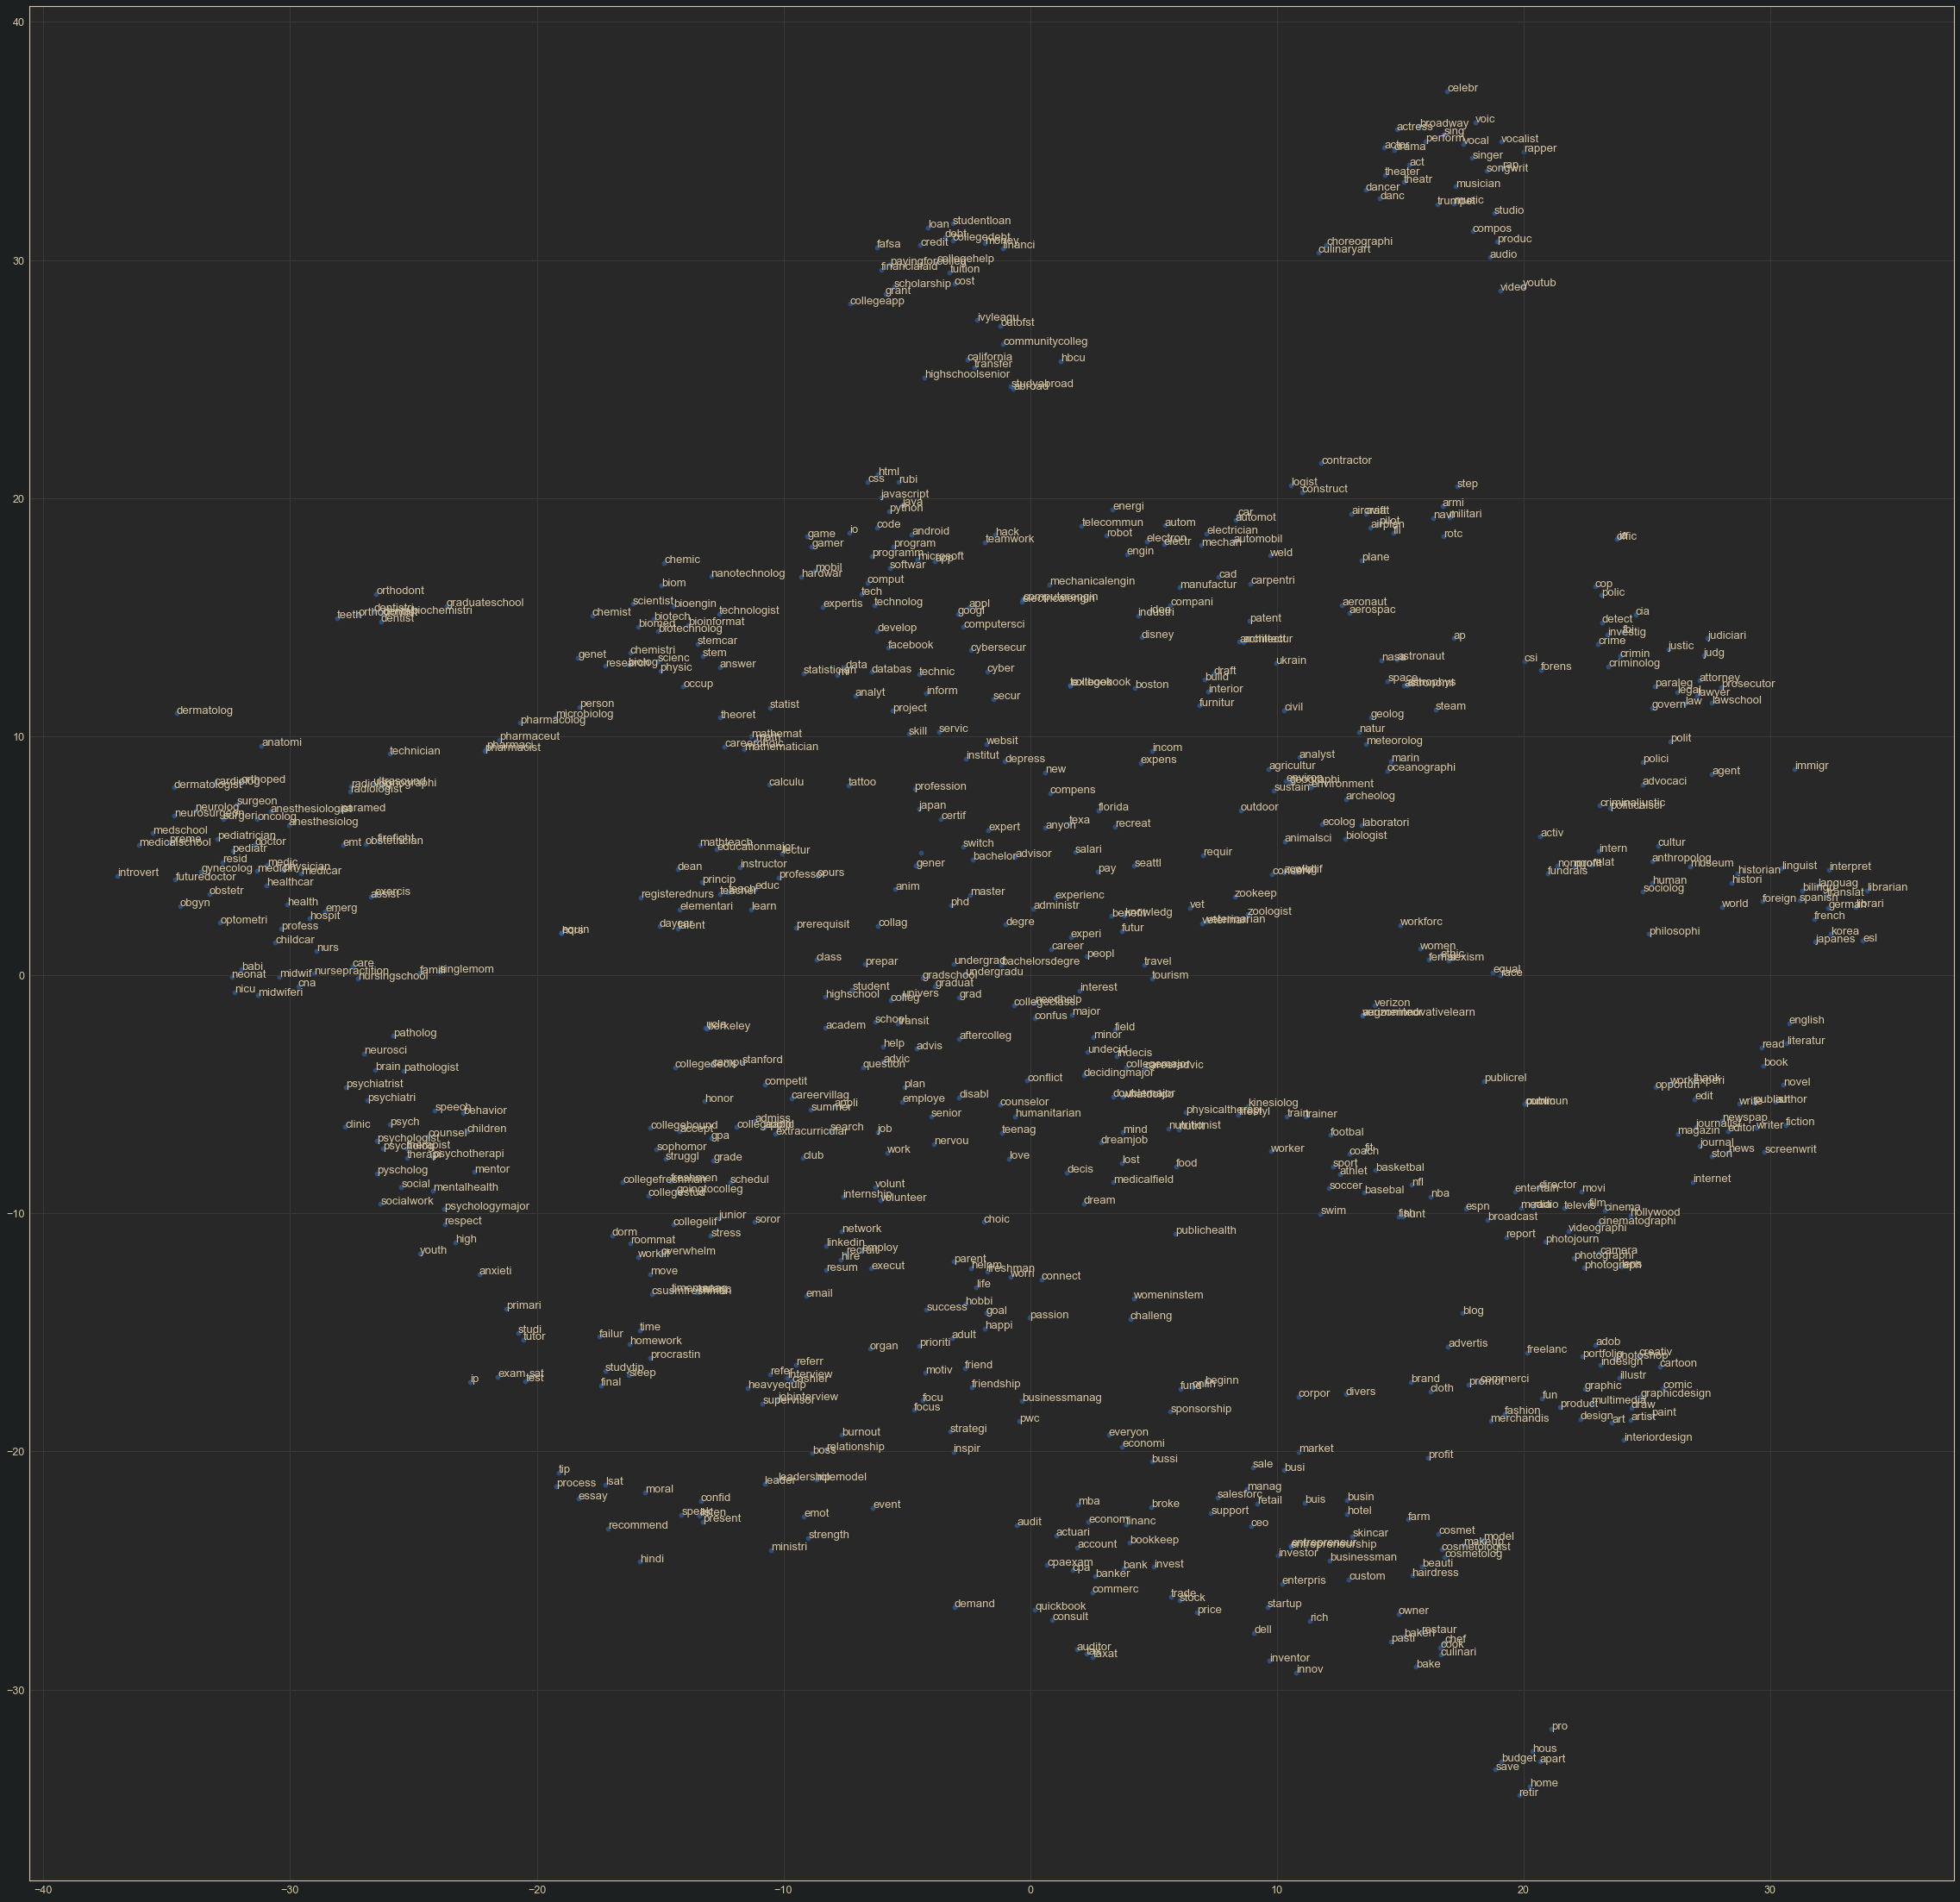

In [78]:
fig, ax = plt.subplots(figsize = (40, 40))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

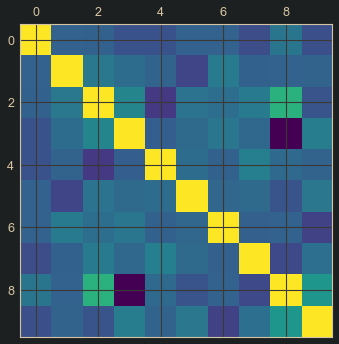

In [79]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [80]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.012125,-0.017838,-0.101693,-0.102287,-0.009688,-0.011379,-0.122850,0.097803,-0.110591
1,-0.012125,1.000000,0.117369,0.049155,-0.002192,-0.166123,0.142561,-0.016317,-0.009749,-0.002257
2,-0.017838,0.117369,1.000000,0.197773,-0.230616,0.090136,0.060833,0.139260,0.467490,-0.089239
3,-0.101693,0.049155,0.197773,1.000000,-0.033180,0.034117,0.105093,0.023795,-0.473039,0.153222
4,-0.102287,-0.002192,-0.230616,-0.033180,1.000000,0.048030,-0.017957,0.160430,0.029308,-0.004248
5,-0.009688,-0.166123,0.090136,0.034117,0.048030,1.000000,0.015243,0.038187,-0.092968,0.113315
6,-0.011379,0.142561,0.060833,0.105093,-0.017957,0.015243,1.000000,-0.020634,-0.007391,-0.179621
7,-0.122850,-0.016317,0.139260,0.023795,0.160430,0.038187,-0.020634,1.000000,-0.150358,0.067313
8,0.097803,-0.009749,0.467490,-0.473039,0.029308,-0.092968,-0.007391,-0.150358,1.000000,0.303539
9,-0.110591,-0.002257,-0.089239,0.153222,-0.004248,0.113315,-0.179621,0.067313,0.303539,1.000000


# Save

In [81]:
d2v.save('tags.d2v')

In [82]:
docvecs = {d2v.docvecs.index2entity[i]: d2v.docvecs.vectors_docs[i] for i in range(len(d2v.docvecs.index2entity))}

In [86]:
with open('tags_embs.pickle', 'wb') as file:
    pickle.dump(docvecs, file)